# Using elliptic curves and isogenies in SageMath

This is a short tutorial to get started with elliptic curves in SageMath. For a complete reference, see the official documentation:

- [The "getting started" tutorial](http://doc.sagemath.org/html/en/tutorial/index.html);
- [Other SageMath tutorials](http://doc.sagemath.org/html/en/thematic_tutorials/index.html);
- [Finite fields (reference)](http://doc.sagemath.org/html/en/reference/finite_rings/index.html);
- [Number fields](http://doc.sagemath.org/html/en/constructions/number_fields.html), [reference](http://doc.sagemath.org/html/en/reference/number_fields/index.html);
- [Quadratic forms (reference)](http://doc.sagemath.org/html/en/reference/quadratic_forms/index.html);
- [Elliptic curves](http://doc.sagemath.org/html/en/constructions/elliptic_curves.html), [reference](http://doc.sagemath.org/html/en/reference/curves/index.html).

See also the book [Computational Mathematics with SageMath](http://dl.lateralis.org/public/sagebook/sagebook-ba6596d.pdf).

## Finite fields

We create finite fields by passing their cardinality

In [1]:
Fp = GF(11)

In [2]:
Fp

Finite Field of size 11

In [3]:
Fq = GF(11^2)
Fq

Finite Field in z2 of size 11^2

For extension fields, the generator is obtained with the `.gen()` function.

In [4]:
z = Fq.gen()
z

z2

In [5]:
z^120

1

In [6]:
z.multiplicative_order()

120

Same thing in one go

In [7]:
K.<t> = GF(next_prime(2^128)^2)
K

Finite Field in t of size 340282366920938463463374607431768211507^2

In [8]:
parent(t)

Finite Field in t of size 340282366920938463463374607431768211507^2

In [9]:
t.minimal_polynomial()

x^2 + x + 340282366920938463463374607431768211506

other rings

In [10]:
QQ

Rational Field

In [11]:
ZZ

Integer Ring

## Elliptic curves

Curves over $ℚ$

In [12]:
E = EllipticCurve([-10,10])
E

Elliptic Curve defined by y^2 = x^3 - 10*x + 10 over Rational Field

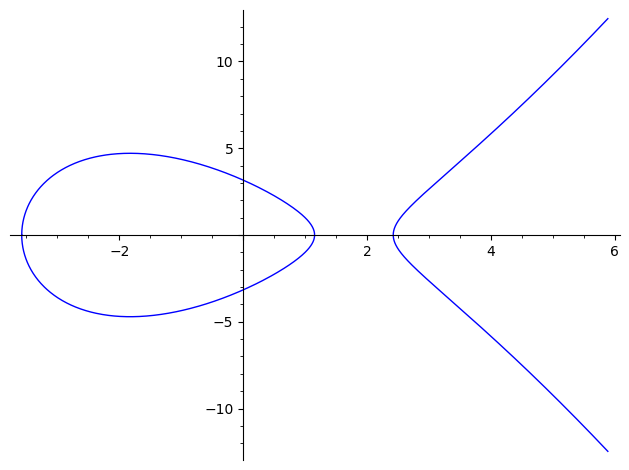

In [13]:
E.plot()

Cuvers over other fields

In [14]:
F = EllipticCurve(GF(11), [1, 0])
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [15]:
F.order()

12

In [16]:
F.cardinality()

12

In [17]:
F.points()

[(0 : 0 : 1), (0 : 1 : 0), (5 : 3 : 1), (5 : 8 : 1), (7 : 3 : 1), (7 : 8 : 1), (8 : 5 : 1), (8 : 6 : 1), (9 : 1 : 1), (9 : 10 : 1), (10 : 3 : 1), (10 : 8 : 1)]

In [18]:
P = F.random_point()
P

(7 : 8 : 1)

In [19]:
P.order()

12

Curves over number fields

In [20]:
K = QQ[i]
K

Number Field in I with defining polynomial x^2 + 1 with I = 1*I

In [21]:
E = EllipticCurve(K, j=0)
E

Elliptic Curve defined by y^2 = x^3 + 1 over Number Field in I with defining polynomial x^2 + 1 with I = 1*I

In [22]:
E.torsion_order()

6

In [23]:
E.torsion_points()

[(-1 : 0 : 1),
 (0 : -1 : 1),
 (0 : 1 : 0),
 (0 : 1 : 1),
 (2 : -3 : 1),
 (2 : 3 : 1)]

In [24]:
E.rank()

0

In [25]:
E = EllipticCurve(j=1)
E

Elliptic Curve defined by y^2 + x*y = x^3 + 36*x + 3455 over Rational Field

In [26]:
E.short_weierstrass_model()

Elliptic Curve defined by y^2 = x^3 + 46629*x + 161056566 over Rational Field

In [27]:
E.torsion_order()

1

In [28]:
E.rank()

2

In [29]:
P, Q = E.gens()
P, Q

((13 : 72 : 1), (43 : 270 : 1))

In [30]:
P.order()

+Infinity

In [31]:
P + P

(-14 : 23 : 1)

In [32]:
13*P

(2738814396081478074164342358580444642585010217987286322086213/29439691676132293080318764323353351862155591578774792639929 : 4322772205991782791649180930126846791518251982934842146164121658655553155126660057907684920/5051261892530217040902924725666439913266827080618013578371709184537008691430244914816467 : 1)

Watch out: computing the rank is not always easy!

In [33]:
EK = E.change_ring(K)
EK

Elliptic Curve defined by y^2 + x*y = x^3 + 36*x + 3455 over Number Field in I with defining polynomial x^2 + 1 with I = 1*I

In [34]:
EK.rank()

ValueError: There is insufficient data to determine the rank - 2-descent gave lower bound 1 and upper bound 3

## Isomorphisms

In [35]:
F = EllipticCurve(GF(11), [1, 0])
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [36]:
F.automorphisms()

[Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
   Via:  (u,r,s,t) = (1, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
   Via:  (u,r,s,t) = (10, 0, 0, 0)]

In [37]:
aut = F.change_ring(GF(11^2)).automorphisms()
aut

[Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (1, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (10, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (4*z2 + 3, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (7*z2 + 8, 0, 0, 0)]

In [38]:
aut[3], aut[3]^2

(Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (7*z2 + 8, 0, 0, 0),
 Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (10, 0, 0, 0))

In [39]:
G = EllipticCurve(GF(11), [3, 0])
F.is_isomorphic(G)

True

In [40]:
G

Elliptic Curve defined by y^2 = x^3 + 3*x over Finite Field of size 11

In [41]:
G.j_invariant()

1

In [42]:
u = F.isomorphism_to(G)
u

Elliptic-curve morphism:
  From: Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
  To:   Elliptic Curve defined by y^2 = x^3 + 3*x over Finite Field of size 11
  Via:  (u,r,s,t) = (8, 0, 0, 0)

Group structure

In [43]:
F.abelian_group()

Additive abelian group isomorphic to Z/12 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [44]:
g = F.gens()[0]
g

(7 : 8 : 1)

In [45]:
g.order()

12

## Scalar multiplication

In [46]:
F = EllipticCurve(GF(11), [1, 0])
g = F.gens()[0]
g

(7 : 8 : 1)

In [47]:
12*g

(0 : 1 : 0)

In [48]:
[(i, i*g) for i in range(12)]

[(0, (0 : 1 : 0)),
 (1, (7 : 8 : 1)),
 (2, (9 : 1 : 1)),
 (3, (10 : 8 : 1)),
 (4, (5 : 3 : 1)),
 (5, (8 : 6 : 1)),
 (6, (0 : 0 : 1)),
 (7, (8 : 5 : 1)),
 (8, (5 : 8 : 1)),
 (9, (10 : 3 : 1)),
 (10, (9 : 10 : 1)),
 (11, (7 : 3 : 1))]

Let's print the multiplication maps

In [49]:
F.multiplication_by_m(12)

((x^144 - 2*x^138 - 2*x^136 - x^134 + 3*x^132 - 5*x^130 - 5*x^128 - 5*x^126 - 4*x^124 + 5*x^122 + x^120 + 4*x^118 - 2*x^116 - 3*x^114 + 5*x^112 - 2*x^110 + 2*x^108 - x^106 - 4*x^104 + x^102 - 4*x^100 + 5*x^98 + x^94 - 4*x^92 - 3*x^90 - 3*x^88 + 3*x^86 - 3*x^84 - 4*x^82 + 3*x^80 + 2*x^78 + 5*x^76 + 2*x^74 - 2*x^72 + 2*x^70 + 5*x^68 + 2*x^66 + 3*x^64 - 4*x^62 - 3*x^60 + 3*x^58 - 3*x^56 - 3*x^54 - 4*x^52 + x^50 + 5*x^46 - 4*x^44 + x^42 - 4*x^40 - x^38 + 2*x^36 - 2*x^34 + 5*x^32 - 3*x^30 - 2*x^28 + 4*x^26 + x^24 + 5*x^22 - 4*x^20 - 5*x^18 - 5*x^16 - 5*x^14 + 3*x^12 - x^10 - 2*x^8 - 2*x^6 + 1)/(x^143 - 2*x^137 - 2*x^135 - x^133 + 3*x^131 - 5*x^129 - 5*x^127 - 5*x^125 - 4*x^123 + 5*x^121 + x^119 + 4*x^117 - 2*x^115 - 3*x^113 + 5*x^111 - 2*x^109 + 2*x^107 - x^105 - 4*x^103 + x^101 - 4*x^99 + 5*x^97 + x^93 - 4*x^91 - 3*x^89 - 3*x^87 + 3*x^85 - 5*x^83 - 5*x^81 - 5*x^79 - x^77 + 3*x^75 - x^73 - x^71 + 3*x^69 - x^67 - 5*x^65 - 5*x^63 - 5*x^61 + 3*x^59 - 3*x^57 - 3*x^55 - 4*x^53 + x^51 + 5*x^47 - 

Using LaTeX-ified output is much nicer

In [50]:
%display latex

In [51]:
F.multiplication_by_m(12, x_only=True)

(x^144 + 9*x^138 + 9*x^136 + 10*x^134 + 3*x^132 + 6*x^130 + 6*x^128 + 6*x^126 + 7*x^124 + 5*x^122 + x^120 + 4*x^118 + 9*x^116 + 8*x^114 + 5*x^112 + 9*x^110 + 2*x^108 + 10*x^106 + 7*x^104 + x^102 + 7*x^100 + 5*x^98 + x^94 + 7*x^92 + 8*x^90 + 8*x^88 + 3*x^86 + 8*x^84 + 7*x^82 + 3*x^80 + 2*x^78 + 5*x^76 + 2*x^74 + 9*x^72 + 2*x^70 + 5*x^68 + 2*x^66 + 3*x^64 + 7*x^62 + 8*x^60 + 3*x^58 + 8*x^56 + 8*x^54 + 7*x^52 + x^50 + 5*x^46 + 7*x^44 + x^42 + 7*x^40 + 10*x^38 + 2*x^36 + 9*x^34 + 5*x^32 + 8*x^30 + 9*x^28 + 4*x^26 + x^24 + 5*x^22 + 7*x^20 + 6*x^18 + 6*x^16 + 6*x^14 + 3*x^12 + 10*x^10 + 9*x^8 + 9*x^6 + 1)/(x^143 + 9*x^137 + 9*x^135 + 10*x^133 + 3*x^131 + 6*x^129 + 6*x^127 + 6*x^125 + 7*x^123 + 5*x^121 + x^119 + 4*x^117 + 9*x^115 + 8*x^113 + 5*x^111 + 9*x^109 + 2*x^107 + 10*x^105 + 7*x^103 + x^101 + 7*x^99 + 5*x^97 + x^93 + 7*x^91 + 8*x^89 + 8*x^87 + 3*x^85 + 6*x^83 + 6*x^81 + 6*x^79 + 10*x^77 + 3*x^75 + 10*x^73 + 10*x^71 + 3*x^69 + 10*x^67 + 6*x^65 + 6*x^63 + 6*x^61 + 3*x^59 + 8*x^57 + 8*x^55 + 7*x^53 + x^51 + 5*x^47 + 7*x^45 + x^43 + 7*x^41 + 10*x^39 + 2*x^37 + 9*x^35 + 5*x^33 + 8*x^31 + 9*x^29 + 4*x^27 + x^25 + 5*x^23 + 7*x^21 + 6*x^19 + 6*x^17 + 6*x^15 + 3*x^13 + 10*x^11 + 9*x^9 + 9*x^7 + x)

In [52]:
m3 = F.multiplication_by_m(3)
m3

((x^9 - x^7 - 3*x^5 + 3*x^3 - 2*x)/(-2*x^8 + 3*x^6 - 3*x^4 - x^2 + 1),
 (-4*x^12*y + 5*x^6*y + 3*x^4*y - 3*x^2*y + y)/(2*x^12 + x^10 - 3*x^6 + 5*x^2 + 4))

In [53]:
d3 = m3[0].denominator()
d3

-2*x^8 + 3*x^6 - 3*x^4 - x^2 + 1

In [54]:
parent(d3)

Multivariate Polynomial Ring in x, y over Finite Field of size 11

The multiplication maps are rational fractions in $x$ and $y$, so if we want the denominator as a polynomial in $x$ we need to convert it explicitly

In [55]:
d3 = d3.univariate_polynomial()
parent(d3)

Univariate Polynomial Ring in x over Finite Field of size 11

In [56]:
d3.factor()

(9) * (x + 5)^2 * (x + 6)^2 * (x^2 + 5)^2

Given an $x$-coordinate, we can get a point with that coordinate, if it exists

In [57]:
P = F.lift_x(-6)
P

(5 : 3 : 1)

In [58]:
P.order()

3

In [59]:
Q = F.lift_x(-5)

ValueError: No point with x-coordinate 6 on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [60]:
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [61]:
y5 = GF(11)(-5^3 -5)
y5

2

In [62]:
y5.is_square()

False

In [63]:
%display plain

If we change the base ring of the curve (e.g. from $𝔽_{11}$ to $𝔽_{121}$), more points appear

In [64]:
F2 = F.change_ring(GF(11^2))
F2

Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2

In [65]:
Q = F2.lift_x(-5)
Q

(6 : z2 + 9 : 1)

In [66]:
Q.order()

3

However we cannot mindlessly combine points over $𝔽_{11}$ with points over $𝔽_{121}$

In [67]:
P + Q

TypeError: unsupported operand parent(s) for +: 'Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11' and 'Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2'

We must instead explicitly lift the points from $E/𝔽_{11}$ to $E/𝔽_{121}$

In [68]:
P2 = F2(P)

In [69]:
P2 + Q

(5*z2 + 1 : 9*z2 + 9 : 1)

Here is the full 3-torsion subgroup

In [70]:
[i*P2 + j*Q for i in range(3) for j in range(3)]

[(0 : 1 : 0),
 (6 : z2 + 9 : 1),
 (6 : 10*z2 + 2 : 1),
 (5 : 3 : 1),
 (5*z2 + 1 : 9*z2 + 9 : 1),
 (6*z2 + 10 : 2*z2 + 1 : 1),
 (5 : 8 : 1),
 (6*z2 + 10 : 9*z2 + 10 : 1),
 (5*z2 + 1 : 2*z2 + 2 : 1)]

We check that the $x$-coordinates correspond to the roots of the denominator of the multiplication-by-3 map we had previously computed

In [71]:
d3

9*x^8 + 3*x^6 + 8*x^4 + 10*x^2 + 1

In [72]:
d3.roots(GF(11^2))

[(6, 2), (5, 2), (6*z2 + 10, 2), (5*z2 + 1, 2)]

And we check that the denominator is the square of the 3-division polynomial

In [73]:
d3.is_square()

True

In [74]:
d3.sqrt()

3*x^4 + 6*x^2 + 10

In [75]:
F.division_polynomial(3)

3*x^4 + 6*x^2 + 10

## Your turn!

### Exercise 1 ★

Find a random curve over $𝔽_{127}$ with $129$ points.



In [76]:
k = GF(127)

A basic loop where we try random Weierstrass equation until we find one.

Careful with the discriminant of the elliptic curve, which must be ≠ 0!

In [77]:
while True:
    a = k.random_element()
    b = k.random_element()
    if 4*a^3 + 27*b^2 != 0:
        E = EllipticCurve([a,b])
        if E.order() == 129:
            break
E, E.order()

(Elliptic Curve defined by y^2 = x^3 + 50*x + 32 over Finite Field of size 127,
 129)

The same idea, but we try random j-invariants.

This time we need to be careful with the fact that a single j-invariant corresponds to several GF(127)-isomorphism classes. To be sure to hit a curve, we test both the default curve given by Sage and its quadratic twist.

In [78]:
while True:
    E = EllipticCurve(k, j = k.random_element())
    if E.order() == 129:
        break
    E = E.quadratic_twist()
    if E.order() == 129:
        break    
E, E.order()

(Elliptic Curve defined by y^2 = x^3 + 101*x + 92 over Finite Field of size 127,
 129)

#### Exercise 1.2 ★★

Let $E$ be one such curve. What is the degree of the smallest extension $k$ of $𝔽_{127}$ such that $E(k)[129] \simeq ℤ/129ℤ × ℤ/129ℤ$?



We already that a cyclic subgroup of order 129 is defined over $𝔽_{127}$.

In [79]:
P = E.gens()[0]

In [80]:
P.order()

129

To find the extension where the rest of the 129-torsion is defined, we factor the 129-division polynomial

In [81]:
phi = E.division_polynomial(129)
phi

2*x^8320 + 101*x^8318 + 92*x^8317 + 85*x^8316 + 53*x^8315 + 5*x^8314 + 81*x^8313 + 107*x^8312 + 31*x^8311 + 84*x^8310 + 34*x^8309 + 46*x^8308 + 33*x^8307 + 69*x^8306 + 10*x^8305 + 101*x^8304 + 111*x^8303 + 59*x^8302 + 18*x^8301 + 19*x^8300 + 37*x^8299 + 33*x^8298 + 60*x^8297 + 17*x^8296 + 72*x^8295 + 76*x^8294 + 22*x^8293 + 33*x^8292 + 23*x^8291 + 17*x^8290 + 26*x^8289 + 122*x^8288 + 72*x^8287 + 107*x^8286 + 55*x^8285 + 35*x^8284 + 23*x^8283 + 47*x^8282 + 97*x^8281 + 116*x^8280 + 74*x^8279 + 76*x^8278 + 20*x^8277 + 36*x^8276 + 43*x^8275 + 115*x^8274 + 27*x^8273 + 107*x^8272 + 21*x^8271 + 60*x^8270 + 40*x^8269 + 52*x^8268 + x^8267 + 119*x^8266 + 77*x^8265 + 95*x^8264 + 88*x^8263 + 12*x^8262 + 7*x^8261 + 72*x^8260 + 27*x^8259 + 119*x^8258 + 14*x^8257 + 81*x^8256 + 44*x^8255 + 122*x^8254 + 100*x^8253 + 126*x^8252 + 7*x^8251 + 86*x^8250 + 19*x^8249 + 68*x^8248 + 64*x^8247 + 10*x^8246 + 111*x^8245 + 31*x^8244 + 65*x^8243 + 91*x^8242 + 105*x^8241 + 69*x^8240 + 56*x^8239 + 76*x^8238 + 71*x^82

In [82]:
phi.factor()

(2) * (x + 1) * (x + 2) * (x + 3) * (x + 6) * (x + 8) * (x + 12) * (x + 13) * (x + 18) * (x + 21) * (x + 22) * (x + 24) * (x + 25) * (x + 27) * (x + 29) * (x + 30) * (x + 34) * (x + 35) * (x + 40) * (x + 42) * (x + 43) * (x + 47) * (x + 49) * (x + 54) * (x + 55) * (x + 56) * (x + 58) * (x + 59) * (x + 61) * (x + 62) * (x + 66) * (x + 69) * (x + 70) * (x + 71) * (x + 72) * (x + 73) * (x + 74) * (x + 76) * (x + 77) * (x + 78) * (x + 82) * (x + 84) * (x + 86) * (x + 87) * (x + 88) * (x + 89) * (x + 93) * (x + 96) * (x + 99) * (x + 102) * (x + 103) * (x + 104) * (x + 105) * (x + 106) * (x + 107) * (x + 108) * (x + 109) * (x + 116) * (x + 117) * (x + 118) * (x + 119) * (x + 121) * (x + 122) * (x + 123) * (x + 124) * (x^3 + x^2 + 95*x + 7) * (x^3 + 3*x^2 + 68*x + 114) * (x^3 + 10*x^2 + 37*x + 44) * (x^3 + 13*x^2 + 60*x + 14) * (x^3 + 16*x^2 + 83*x + 111) * (x^3 + 17*x^2 + 6*x + 101) * (x^3 + 18*x^2 + 56*x + 91) * (x^3 + 27*x^2 + 125*x + 1) * (x^3 + 29*x^2 + 98*x + 108) * (x^3 + 30*x^2 + 21*x

Inspection by hand shows non-linear factors of degrees 3, 7 and 21. Because we are over finite fields, all these factors split completely over $𝔽_{127^{21}}$.

In [83]:
EE = E.change_ring(GF(127^21))
EE

Elliptic Curve defined by y^2 = x^3 + 101*x + 92 over Finite Field in z21 of size 127^21

We check that 129 = 3·43 divides the order twice... good sign!

In [84]:
EE.order().factor()

2^2 * 3^5 * 7^4 * 43^2 * 2017 * 3697 * 18691 * 3958039 * 47627959 * 1334605399

In [85]:
129.factor()

3 * 43

To confirm that $E[129] ⊂ E(𝔽_{127^{21}})$, we compute the group structure and confirm it contains a subgroup isomorphic to $ℤ/129ℤ × ℤ/129ℤ$.

In [86]:
EE.abelian_group()

Additive abelian group isomorphic to Z/3989707887872872950951218050907507834298 + Z/37926 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 101*x + 92 over Finite Field in z21 of size 127^21

In [87]:
3989707887872872950951218050907507834298.factor()

2 * 3^3 * 7^2 * 43 * 2017 * 3697 * 18691 * 3958039 * 47627959 * 1334605399

In [88]:
37926.factor()

2 * 3^2 * 7^2 * 43

As an extra confirmation, we check that the division polynomial splits completely over $𝔽_{127^{21}}$.

In [89]:
%time len(EE.division_polynomial(129).roots())

CPU times: user 38.2 s, sys: 110 ms, total: 38.3 s
Wall time: 38.2 s


8320

In [90]:
(129^2 - 1) / 2

8320

That was slow! To get the same info quicker, we recall that 129 = 3 · 43, and factor the 3rd and 43rd division polynomial instead

In [91]:
%time EE.division_polynomial(3).factor()

CPU times: user 2.23 ms, sys: 0 ns, total: 2.23 ms
Wall time: 2.24 ms


(3) * (x + 25) * (x + 46*z21^20 + 13*z21^19 + 37*z21^18 + 75*z21^17 + 14*z21^16 + 54*z21^15 + 82*z21^14 + 98*z21^13 + 30*z21^12 + 47*z21^11 + 118*z21^10 + 24*z21^9 + 64*z21^8 + 5*z21^7 + 19*z21^6 + 41*z21^5 + 113*z21^4 + 48*z21^3 + 118*z21^2 + 103*z21 + 20) * (x + 123*z21^20 + 52*z21^19 + 62*z21^18 + 33*z21^17 + 99*z21^16 + 6*z21^15 + 4*z21^14 + z21^13 + 78*z21^12 + 21*z21^11 + 101*z21^10 + 33*z21^9 + 15*z21^8 + 79*z21^7 + 120*z21^6 + 79*z21^5 + 93*z21^4 + 124*z21^3 + 14*z21^2 + 126*z21 + 33) * (x + 85*z21^20 + 62*z21^19 + 28*z21^18 + 19*z21^17 + 14*z21^16 + 67*z21^15 + 41*z21^14 + 28*z21^13 + 19*z21^12 + 59*z21^11 + 35*z21^10 + 70*z21^9 + 48*z21^8 + 43*z21^7 + 115*z21^6 + 7*z21^5 + 48*z21^4 + 82*z21^3 + 122*z21^2 + 25*z21 + 49)

In [92]:
%time len(EE.division_polynomial(43).roots())

CPU times: user 1.25 s, sys: 6.61 ms, total: 1.26 s
Wall time: 1.26 s


924

In [93]:
(43^2 - 1 ) / 2

924

### Exercise 2 ★

Implement the Diffie–Hellman key exchange on the curve of exercise 1. That is, write two functions that implement the first and the second phase of the key exchange, and check that the shared key matches

In [94]:
E

Elliptic Curve defined by y^2 = x^3 + 101*x + 92 over Finite Field of size 127

In [95]:
E.order()

129

In [96]:
P = E.gens()[0]

In [97]:
def keyex1(g, n):
    '''
    Parameters: g is the group generator, n its order.
    '''
    a = randrange(0, n)
    A = a * g
    return (a, A)

In [98]:
def keyex2(ek, sk):
    '''
    Parameters: ek is the received ephemeral key, sk is our secret key.
    '''
    return sk * ek

We check that Alice and Bob obtain the same shared key

In [99]:
# Alice
a, A = keyex1(P, E.order())
a, A

(55, (19 : 19 : 1))

In [100]:
# Bob
b, B = keyex1(P, E.order())
b, B

(59, (21 : 67 : 1))

In [101]:
# Alice
keyex2(B, a)

(125 : 124 : 1)

In [102]:
# Bob
keyex2(A, b)

(125 : 124 : 1)

### Exercise 3 ★

Let $E$ be the elliptic curve over $\mathbb{F}_5$ given by the Weierstrass equation $E: y^2 + y = x^3 - x$.

Compute $\#E(\mathbb{F_{5^n}})$ for $n=1,\ldots,20$.


In [103]:
E = EllipticCurve(GF(5), [0,0,1,-1,0])
E

Elliptic Curve defined by y^2 + y = x^3 + 4*x over Finite Field of size 5

In [104]:
for i in range(1, 21):
    print(E.change_ring(GF(5^i)).order())

8
32
104
640
3208
15392
78184
391680
1950728
9765152
48841064
244117120
1220685448
6103668512
30517360744
152587560960
762941199368
3814695421472
19073481285224
95367450947200


The `.order()` function has an optional parameter `extension_degree` to do the same in one go

In [105]:
for i in range(1,21):
    print(E.order(extension_degree=i))

8
32
104
640
3208
15392
78184
391680
1950728
9765152
48841064
244117120
1220685448
6103668512
30517360744
152587560960
762941199368
3814695421472
19073481285224
95367450947200


#### Exercise 3.1 ★★

Denote by $\pi:E\to E$ the $5$\-Frobenius endomorphism of the curve in the previous exercise. Find a monic quadratic polynomial of which $\pi$ is a zero in $\mathrm{End}(E)$. 


Thanks to Hasse's theorem, we know that Frobenius has characteristic polynomial $π^2 - tπ + p$, with $p + 1 - t = \# E(𝔽_p)$

In [106]:
q = 5
t = q + 1 - E.order()

A.<π> = ZZ[]
π^2 - t*π + q

π^2 + 2*π + 5

Sage has a function to directly compute this polynomial

In [107]:
p = E.frobenius_polynomial()
p

x^2 + 2*x + 5

By finding a root of this polynomial over $\mathbb{C}$, write down a formula for $\pi$ as an algebraic number. That is, give an embedding $\mathbb{Z}[\pi]\to\mathbb{C}$. Show that the conjugate of $\pi$ as a complex number corresponds to the dual isogeny under this embedding.



We convert the polynomial to one in $ℂ[x]$ and we factor

In [108]:
p.change_ring(CC).factor()

(x + 1.00000000000000 - 2.00000000000000*I) * (x + 1.00000000000000 + 2.00000000000000*I)

For better readability, we can use Sage's `QQbar`, the algebraic closure of $ℚ$.

In [109]:
p.change_ring(QQbar).factor()

(x + 1 - 2*I) * (x + 1 + 2*I)

We arbitrarily choose to map $π$ to the root $-1 + 2i$. By duality, it is easy to see that the dual $\hat{π}$ is also a root of the same polynomial. If we can show that $π ≠ \hat{π}$, we know that it must be mapped to $-1 -2i$.

By contraddiction, suppose that $π = \hat{π}$, then $[5] = π\hat{π} = π^2$. We check that this is not the case by taking a random point and checking that $[5]P ≠ π^2(P).$

In [110]:
S = E.random_element()
S

(4 : 4 : 1)

In [111]:
5*S

(0 : 4 : 1)

Write down a formula for $\#E(\mathbb{F_{5^n}})$ in terms of this algebraic number. Check that this agrees with the answer from the first point.

By the definition of the characteristic polynomial, we know that $t = π + \hat{π}$. Let $α = -1 + 2i$ be the root computed above, by the identification of $π$ with $α$ we know that $t = α + \bar{α}$. We double check this property.

In [112]:
α, αbar = p.change_ring(QQbar).roots(multiplicities=False)
α, αbar

(-1 - 2*I, -1 + 2*I)

In [113]:
α + αbar

-2

In [114]:
E.trace_of_frobenius()

-2

Let $π_n$ be the Frobenius of $E/𝔽_{5^n}$, write $t_n$ for its trace, so

$$π_n^2 - t_nπ_n + p^n = 0$$

But $π_n = π^n$ and $\hat{π}_n = \hat{π}^n$, thus $t_n = π^n + \hat{π}^n = α^n + \bar{α}^n$. We check this equality for all $1 ≤ n ≤ 20$.

In [115]:
for i in range(1, 21):
    t = α^i + αbar^i
    print(5^i + 1 - t, E.change_ring(GF(5^i)).order() == 5^i + 1 - t)

8 True
32 True
104 True
640 True
3208 True
15392 True
78184 True
391680 True
1950728 True
9765152 True
48841064 True
244117120 True
1220685448 True
6103668512 True
30517360744 True
152587560960 True
762941199368 True
3814695421472 True
19073481285224 True
95367450947200 True


Let $π_n$ be the Frobenius of $E/𝔽_{5^n}$, write $t_n$ for its trace, so

$$π_n^2 - t_nπ_n + p^n = 0$$

with $t_n = π_n + \hat{π_n}$. By the identification with the complex roots of 

But $π_n = π^n$. 

### Exercise 4 ★★

For $p=23$, is there for every $N$ in the Hasse\-Weil interval $[p+1-2\sqrt{p}, p+1+2\sqrt{p}]$ an elliptic curve $E$ over $\mathbb{F}_p$ such that $\#E(\mathbb{F}_p)=N$?


In [116]:
k = GF(23)
traces = set()
for j in k:
    t = EllipticCurve(k, j=j).trace_of_frobenius()
    traces.add(t)
    traces.add(-t)   # do not forget to add the quadratic twist
print(sorted(traces))

[-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [117]:
2*sqrt(23.)

9.59166304662544